In [1]:
import pandas as pd 
import numpy as np
from sklearn import linear_model

In [ ]:
df = pd.read_csv('homeprices.csv')
df  

,area,bedrooms,age,price
0,2600,3.0,20,550000
1,3000,4.0,15,565000
2,3200,NaN,18,610000
3,3600,3.0,30,595000
4,4000,5.0,8,760000
5,4100,6.0,8,810000


In [5]:
#as we see that there is one missing value in the bedroms column now u have to manage them 

#we have to find the median first

df.bedrooms.median()

np.float64(4.0)

In [6]:
# as we see that the median is in the float so we have to convert it into the integer

import math 
median_bedrooms = math.floor(df.bedrooms.median())
median_bedrooms

4

In [12]:
# now we have the fill the all missing data 

df.fillna(median_bedrooms)

,area,bedrooms,age,price
0,2600,3.0,20,550000
1,3000,4.0,15,565000
2,3200,4.0,18,610000
3,3600,3.0,30,595000
4,4000,5.0,8,760000
5,4100,6.0,8,810000


In [13]:
reg = linear_model.LinearRegression()
reg.fit(df[['area','bedrooms','age']],df.price)

LinearRegression()

In [ ]:
reg.coef_

#m1 = 112.06244194 , m2 = 23388.88007794 , m3 = -3231.71790863  this are the coefficient of the area,bedrooms,age

array([  112.06244194, 23388.88007794, -3231.71790863])

In [17]:
reg.intercept_

# this is the intercept b = 221323.00186540408

np.float64(221323.0018654043)

In [ ]:
reg.predict([[3000,3,40]]) # this is the prediction of the price of the house

C:\Users\mishr\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([498408.25158031])

In [ ]:
#CHECKING THE FORMULA

#price = m1*area + m2*bedrooms + m3*age + b

112.06244194*3000 + 23388.88007794*3 + -3231.71790863*40 + 221323.00186540408

498408.2515740241

In [21]:
reg.predict([[5000,5,10]])

C:\Users\mishr\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([866262.43287944])

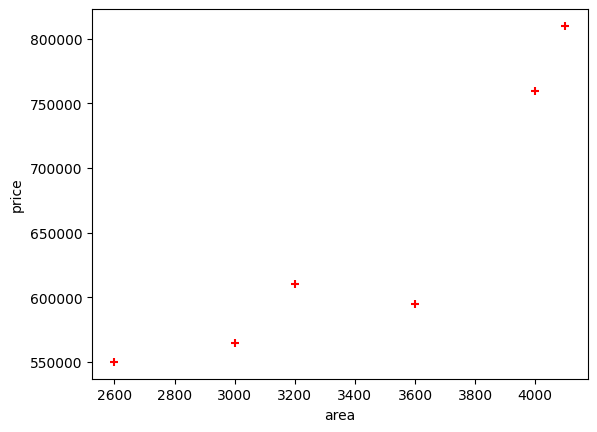

In [25]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.xlabel('area')
plt.ylabel('price')
plt.scatter(df.area,df.price,color='red',marker='+')
